<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/churnPrediction_2348507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [3]:
churn_Data = pd.read_csv('/content/Churn_Modelling - Churn_Modelling.csv')
churn_Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_Data.shape

(10000, 14)

In [5]:
churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
churn_Data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False 

In [7]:
churn_Data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
churn_Data = churn_Data.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [9]:
churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Finding correlation analysis for numerical features

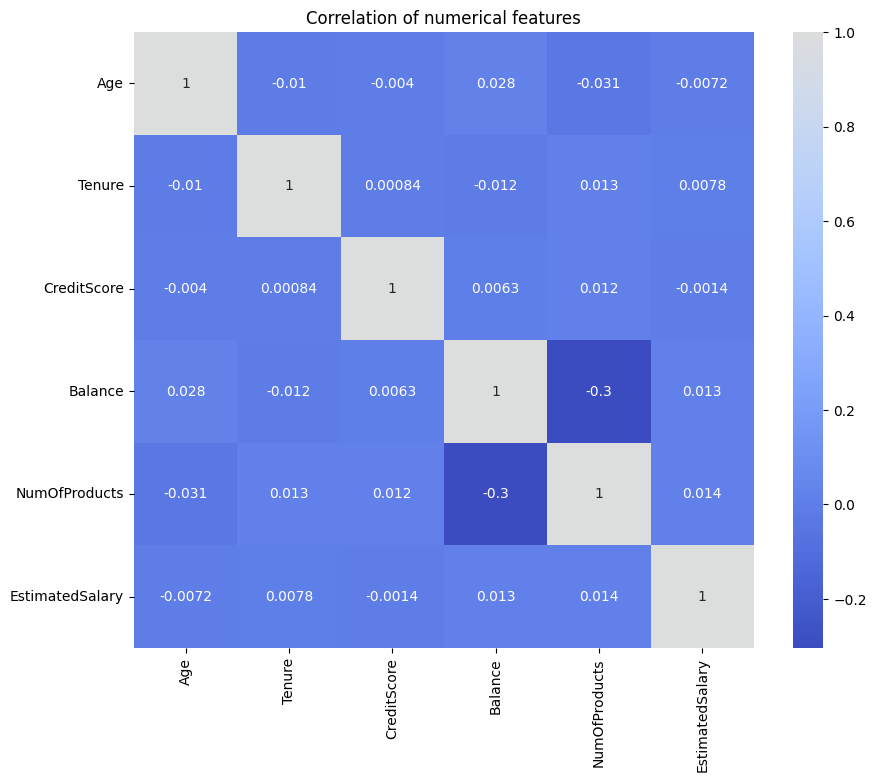

In [15]:
numerical_features = ['Age','Tenure','CreditScore','Balance','NumOfProducts','EstimatedSalary']
corr_matrix = churn_Data[numerical_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,center=True,cmap='coolwarm')
plt.title('Correlation of numerical features')
plt.show()



Relationship between categorical features

Encoding the categorical features to numerical data

In [19]:
from sklearn.preprocessing import LabelEncoder
for col in churn_Data.columns:
  le=LabelEncoder()
  churn_Data[col]=le.fit_transform(churn_Data[col])

In [21]:
churn_Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,0,0,24,2,0,0,1,1,5068,1
1,217,2,0,23,1,743,0,0,1,5639,0
2,111,0,0,24,8,5793,2,1,0,5707,1
3,308,0,0,21,1,0,1,0,0,4704,0
4,459,2,0,25,2,3696,0,1,1,3925,0


In [22]:
cate_features = pd.crosstab(churn_Data['Geography'],churn_Data['Exited'])
chi2,p,dof,expected = chi2_contingency(cate_features)
print(f"P value for geographic and exited : {p}")

P value for geographic and exited : 3.8303176053541544e-66


3.8303176053541544e-66 - value is less than the significance level, so there is a significance relationship between geography and exited

In [23]:
cate_features = pd.crosstab(churn_Data['Age'],churn_Data['Exited'])
chi2,p,dof,expected = chi2_contingency(cate_features)
print(f"P value for age and exited : {p}")

P value for age and exited : 3.7790898005594087e-290


3.7790898005594087e-290 - value is less than the significance level, so there is a significance relationship between age and exited

In [24]:
cate_features = pd.crosstab(churn_Data['Gender'],churn_Data['Exited'])
chi2,p,dof,expected = chi2_contingency(cate_features)
print(f"P value for gender and exited : {p}")

P value for gender and exited : 2.2482100097131755e-26


2.2482100097131755e-26 - value is less than the significance level, so there is a significance relationship between gender and exited

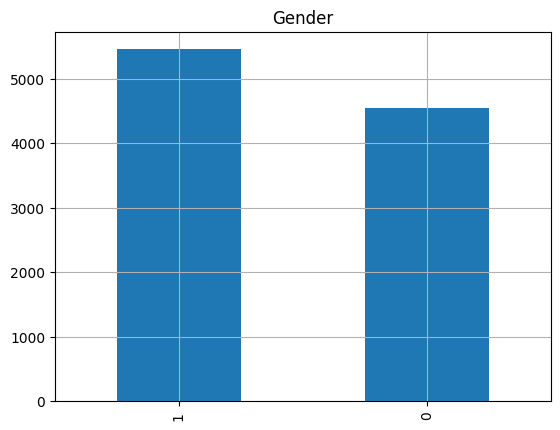

In [25]:
churn_Data['Gender'].value_counts().plot(kind="bar",title="Gender",grid=True)
plt.show()

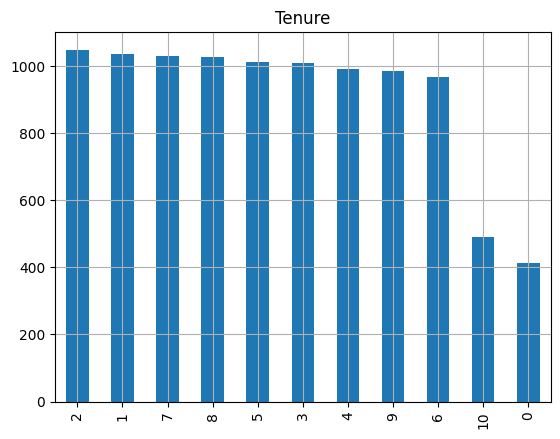

In [26]:
churn_Data['Tenure'].value_counts().plot(kind="bar",title="Tenure",grid=True)
plt.show()

In [ ]:
relation = pd.crosstab(churn_Data['Tenure'],churn_Data['Exited'])
print(relation)

Exited    0    1
Tenure          
0       318   95
1       803  232
2       847  201
3       796  213
4       786  203
5       803  209
6       771  196
7       851  177
8       828  197
9       771  213
10      389  101
